We make an initial exploration of the data

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [138]:
df = pd.read_csv('../data/telecom_sales_data.csv')
df.head()

,Unnamed: 0,marketing_score,competition_index,customer_satisfaction,purchasing_power_index,weather_condition,tech_event,5g_phase,store_traffic,public_transport,city,jPhone_Pro_revenue,Kaggle_Pixel_5_revenue,Planet_SX_revenue
0,2019-01-01,100.00,50.00,85.0,120.00,Bad,NaN,Pre-5G,0.02,Hub,Paris,122182.54,68709.20,36032.11
1,2019-01-02,100.09,50.52,85.0,120.09,Good,NaN,Pre-5G,1.08,Good,Paris,146473.79,73935.56,44180.21
2,2019-01-03,100.18,51.04,85.0,120.17,Moderate,NaN,Pre-5G,-0.24,Limited,Paris,129647.90,75375.54,41112.52
3,2019-01-04,100.27,51.56,85.0,120.26,Moderate,NaN,Pre-5G,-0.13,Poor,Paris,137621.01,85213.00,46222.99
4,2019-01-05,100.36,52.08,85.0,120.34,Bad,NaN,Pre-5G,0.06,Limited,Paris,194936.87,89281.49,38312.08


We adjust the data

In [139]:
# rename first column to 'date'
df.rename(columns={'Unnamed: 0': 'date'}, inplace=True)

# convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# for ease of use
jhone = 'jPhone_Pro_revenue'
kaggle = 'Kaggle_Pixel_5_revenue'
planet = 'Planet_SX_revenue'

# remove nan errors
df['tech_event'] = df['tech_event'].fillna('')

We make exploration of different variables

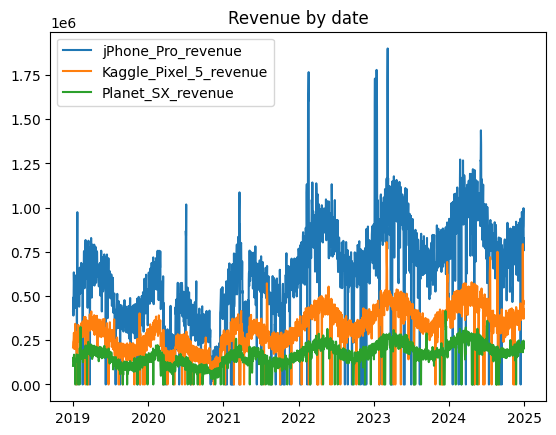

In [140]:
# time
df_by_date = df.groupby('date').sum()
dates = df_by_date.index

# plot
plt.plot(dates, df_by_date[jhone], label=jhone)
plt.plot(dates, df_by_date[kaggle], label=kaggle)
plt.plot(dates, df_by_date[planet], label=planet)
plt.legend()
plt.title('Revenue by date');

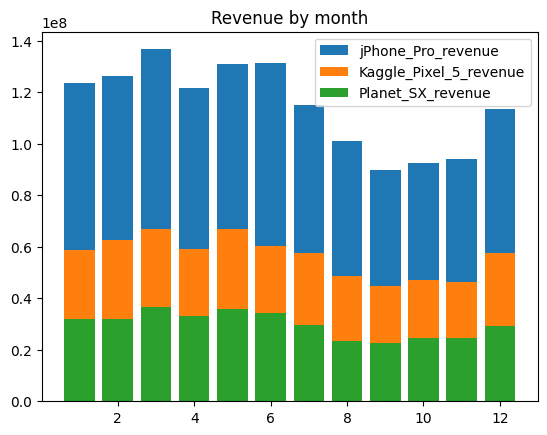

In [ ]:
# by month
months = df_by_date.index.month
df_by_month = df_by_date.groupby(months).sum()

# plot
plt.bar(df_by_month.index, df_by_month[jhone], label=jhone)
plt.bar(df_by_month.index, df_by_month[kaggle], label=kaggle)
plt.bar(df_by_month.index, df_by_month[planet], label=planet)
plt.legend()
plt.title('Revenue by month');